In [6]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 21.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 39.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 29.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

#https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html


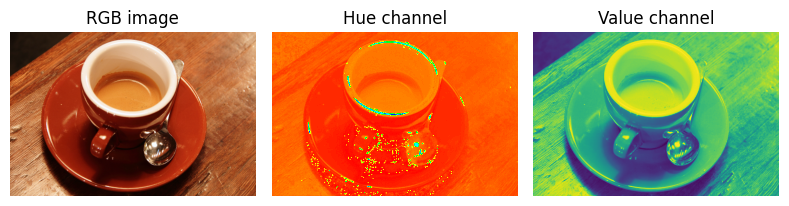

In [6]:
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

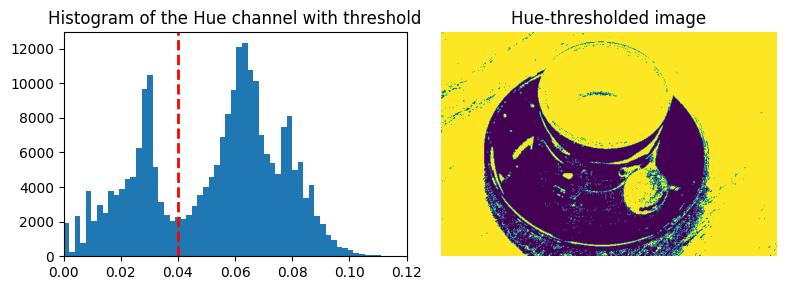

In [7]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

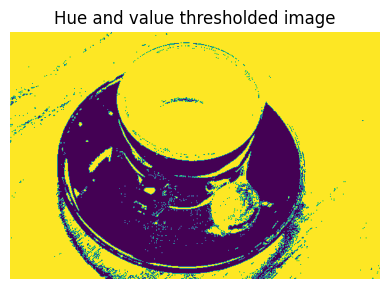

In [8]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
#facial recognition
#https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81



In [9]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 38.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# I'm using Lauren's code. 

In [1]:
import cv2

In [4]:
import numpy as np
from skimage import data
from skimage import feature

import matplotlib.pyplot as plt
from matplotlib import patches

In [5]:
def crop(face_rectangle, img: np.ndarray) -> np.ndarray:
    """Helper function for detect_faces.
    Crops the image to contain just the detected face.
    """
    x0 = face_rectangle["x"]
    y0 = face_rectangle["y"]
    width = face_rectangle["width"]
    height = face_rectangle["height"]
    return img[y0:y0+height, x0:x0+width, :]


def detect_faces(img: np.ndarray) -> plt.Axes:
    # Load the trained file from the module root.
    trained_file = data.lbp_frontal_face_cascade_filename()
    # Initialize the detector cascade.
    detector = feature.Cascade(trained_file)
    detected = detector.detect_multi_scale(img=img,
                                           scale_factor=1.2,
                                           step_ratio=1,
                                           min_size=(60, 60),
                                           max_size=(123, 123))
    face_rectangles = []
    for rectangle in detected:
        face_rectangle = {
            "x": rectangle['c'],
            "y": rectangle['r'],
            "width": rectangle['width'],
            "height": rectangle['height'],
        }
        face_rectangles.append(face_rectangle)

    return face_rectangle

In [6]:
from IPython.display import Image

In [8]:
testimage = Image(url="https://variety.com/wp-content/uploads/2020/06/ben-whishaw-e1592006683220.jpg?crop=0px%2C84px%2C2000px%2C1125px&resize=681%2C383")

In [17]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray
  
  
# load the image and convert into
# numpy array
testimage = Image.open("wcdataset/brightwintercool.png")
  
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(testimage)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  

<class 'numpy.ndarray'>


In [20]:
detect_faces(testimage)

AttributeError: shape

In [ ]:
#next steps extract pixel values from each color and make these ranges. I can do that with
#eye drop. And then test it on the images. 